In [1]:
using Pkg; 
Pkg.add("ReactionNetworkImporters")
Pkg.add("Dictionaries")
Pkg.add("LaTeXStrings")
Pkg.add("Statistics")
Pkg.add("ColorSchemes")
_ = IJulia.clear_output(true)

0

In [2]:
using DifferentialEquations;
using Random;
using Plots;
using Formatting;
using LinearAlgebra;
using Noise;
using ReactionNetworkImporters;
using Dictionaries;
using LaTeXStrings;
using Statistics;
using ColorSchemes;
using Catalyst;
using Latexify;
using ModelingToolkit;

In [149]:
# Simulate a custom ODE
function simulate_reaction_network(network, u0, p;tspan=(0.0, 1.0), rate=1.0, reltol=1e-8, abstol=1e-8, kwargs...)
    # Network parameter variables
    oprob = ODEProblem(network, u0, tspan, p)
    sol = solve(oprob, Rodas4(), reltol=reltol, abstol=abstol, kwargs...)
    return sol
end

function get_index_of(prefix, vec)
    ret = []
    for i in 1:length(vec)
        vec_i = vec[i]
        if startswith("$vec_i", prefix)
            push!(ret, i)
        end
    end
    
    @assert length(ret) == 1 "Prefix: $prefix, vec: $vec"
    return ret[1]
end

function get_species_array(rn)
    ret = []
    for s in species(rn)
        push!(ret, replace(string(s), "(t)" => ""))
    end
    return ret
end

get_species_array (generic function with 1 method)

In [190]:
prod = @reaction_network prod begin
    0.002, X1 + React --> Flux
    (0.001, 0.001), Flux + Produce <--> X2 + ProduceInt
    0.002, Helper + ProduceInt --> X1
    0.2, O1 --> O1 + O2
end
print(species(prod))

u = [
    :X1=> 1,
    :React=>4000,
    :Produce=>10000,
    :Helper=>1000,
    :X2=>0,
    :Flux=>0,
    :ProduceInt=>0,
    :O1=> 1,
    :O2=> 0
]
p = []

sol = simulate_reaction_network(prod, u, p, tspan=(0.0, 20000))
nothing

Term{Real, Base.ImmutableDict{DataType, Any}}[X1(t), React(t), Flux(t), Produce(t), X2(t), ProduceInt(t), Helper(t), O1(t), O2(t)]

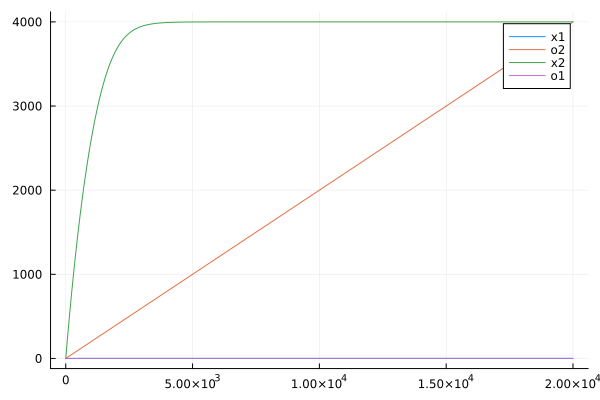

In [189]:
x1 = getindex.(sol.u, 1)
react = getindex.(sol.u, 2)
flux = getindex.(sol.u, 3)
prod = getindex.(sol.u, 4)
x2 = getindex.(sol.u, 5)
prodint = getindex.(sol.u, 6)
helper = getindex.(sol.u, 7)
o1 = getindex.(sol.u, 8)
o2 = getindex.(sol.u, 9)
t = sol.t
plot(t, [x1, o2, x2, o1], labels=["x1" "o2" "x2" "o1"], legend=true)